## Observations and Insights 

In [98]:
%matplotlib inline

In [146]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
from scipy.stats import linregress

In [147]:
mouse_metadata = pd.read_csv(os.path.join(os.getcwd(),'resources', 'Mouse_metadata.csv'))
study_results = pd.read_csv(os.path.join(os.getcwd(), 'resources','Study_results.csv'))

In [148]:
# Combine the data into a single dataset

df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview

df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [149]:
# Checking the number of mice.

num_mice = len(df['Mouse ID'].value_counts())

num_mice

249

In [150]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup = df[df.duplicated(['Mouse ID', 'Timepoint'])]


In [151]:
# Optional: Get all the data for the duplicate mouse ID. 

dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [152]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [153]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = len(df['Mouse ID'].value_counts())

new_num_mice

249

## Summary Statistics

In [154]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sd = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': var, 'Standard Deviation': sd, "SEM": sem})


In [155]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

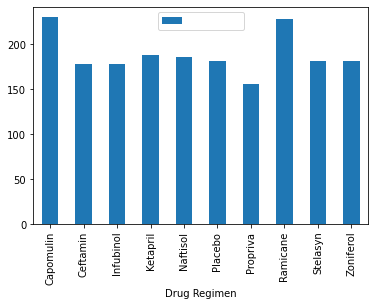

In [157]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tp_data = pd.DataFrame(clean_df.groupby(['Drug Regimen']).count()).reset_index()

tp_df = tp_data[['Drug Regimen', 'Timepoint']]
tp_df = tp_df.set_index('Drug Regimen')

tp_df.plot(kind='bar')

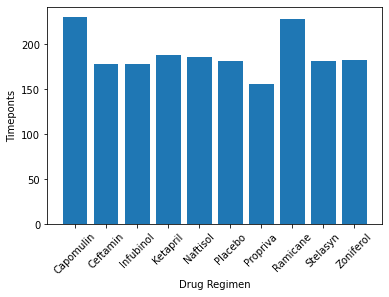

In [158]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
tp_data = pd.DataFrame(clean_df.groupby(['Drug Regimen']).count()).reset_index()

tp_df = tp_data[['Drug Regimen', 'Timepoint']]


plt.bar(tp_df['Drug Regimen'],tp_df['Timepoint'])
plt.xlabel("Drug Regimen")
plt.ylabel('Timeponts')
plt.xticks(rotation = 45)
plt.show()

In [159]:
# Generate a pie chart showing the distribution of female versus male mice using Pandas

gender_data = pd.DataFrame(clean_df.groupby(['Sex']).count()).reset_index()

gender_df = gender_data[['Sex', 'Mouse ID']]

gender_df.head()

,Sex,Mouse ID
0,Female,930
1,Male,958


<AxesSubplot:ylabel='Mouse ID'>

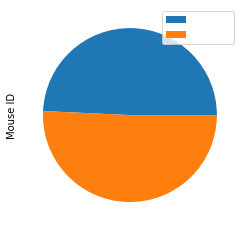

In [160]:
gender_df.plot(kind='pie', y='Mouse ID', labels=gender_df['Sex'])
               

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (clean_df.groupby(['Sex'])['Mouse ID'].count()).tolist()

gender_count

[930, 958]

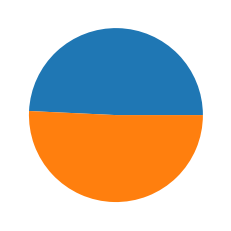

In [162]:
labels = ['Female', 'Male']


plt.pie(gender_count, labels=labels)
plt.rcParams['text.color']='white'


## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [164]:
# Start by getting the last (greatest) timepoint for each mouse
last_df = clean_df.loc[clean_df['Timepoint'] ==45]
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [165]:
cap_df = last_df[last_df['Drug Regimen'].isin(['Capomulin'])]
cap_df.head().reset_index()
cap_tumor_vol = cap_df.sort_values(['Tumor Volume (mm3)'], ascending=True).reset_index()
cap_tumor_vol = cap_tumor_vol['Tumor Volume (mm3)']

In [166]:
ram_df = last_df[last_df['Drug Regimen'].isin(['Ramicane'])]
ram_df.head().reset_index()
ram_tumor_vol = ram_df.sort_values(['Tumor Volume (mm3)'], ascending = True).reset_index()
ram_tumor_vol = ram_tumor_vol ['Tumor Volume (mm3)']

In [167]:
inf_df = last_df[last_df['Drug Regimen'].isin(['Infubinol'])]
inf_df.head().reset_index()
inf_tumor_vol = inf_df.sort_values(['Tumor Volume (mm3)'], ascending = True).reset_index()
inf_tumor_vol = inf_tumor_vol ['Tumor Volume (mm3)']

In [168]:
cef_df = last_df[last_df['Drug Regimen'].isin(['Ceftamin'])]
cef_df.head().reset_index()
cef_tumor_vol = cef_df.sort_values(['Tumor Volume (mm3)'], ascending = True).reset_index()
cef_tumor_vol = cef_tumor_vol ['Tumor Volume (mm3)']

In [169]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

#Capomulin IQR, Quartiles, Outliers

cap_quartiles = cap_tumor_vol.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr= cap_upperq - cap_lowerq
cap_lower_bound = cap_lowerq - (1.5 * cap_iqr)
cap_upper_bound = cap_upperq + (1.5 * cap_iqr)


print(f'#########Capomulin Final Tumor Volume Summary ########')
print(f'Quartiles:{cap_quartiles}')
print(f'Lower Quartile is: {cap_lowerq}')
print(f' Upper Quartile is: {cap_upperq}') 
print(f' The IQR is: {cap_iqr}')
print(f'Values below {cap_lower_bound} or above {cap_upper_bound} could be outliers') 


#Ramicane IQR, Quartiles, Outliers

ram_quartiles = ram_tumor_vol.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr= ram_upperq - ram_lowerq
ram_lower_bound = ram_lowerq - (1.5 * ram_iqr)
ram_upper_bound = ram_upperq + (1.5 * ram_iqr)


print(f'#########Ramicane Final Tumor Volume Summary ########')
print(f'Quartiles:{ram_quartiles}')
print(f'Lower Quartile is: {ram_lowerq}')
print(f' Upper Quartile is: {ram_upperq}') 
print(f' The IQR is: {ram_iqr}')
print(f'Values below {ram_lower_bound} or above {ram_upper_bound} could be outliers') 

#Infubinol IQR, Quartiles, Outliers

inf_quartiles = inf_tumor_vol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr= inf_upperq - inf_lowerq
inf_lower_bound = inf_lowerq - (1.5 * inf_iqr)
inf_upper_bound = inf_upperq + (1.5 * inf_iqr)


print(f'#########Infubinol Final Tumor Volume Summary ########')
print(f'Quartiles:{inf_quartiles}')
print(f'Lower Quartile is: {inf_lowerq}')
print(f' Upper Quartile is: {inf_upperq}') 
print(f' The IQR is: {inf_iqr}')
print(f'Values below {inf_lower_bound} or above {inf_upper_bound} could be outliers') 

#Ceftamin IQR, Quartiles, Outliers

cef_quartiles = cef_tumor_vol.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr= cef_upperq - cef_lowerq
cef_lower_bound = cef_lowerq - (1.5 * cef_iqr)
cef_upper_bound = cef_upperq + (1.5 * cef_iqr)


print(f'#########Ceftamin Final Tumor Volume Summary ########')
print(f'Quartiles: {cef_quartiles}')
print(f'Lower Quartile is: {cef_lowerq}')
print(f' Upper Quartile is: {cef_upperq}') 
print(f' The IQR is: {cef_iqr}')
print(f'Values below {cef_lower_bound} or above {cef_upper_bound} could be outliers') 

#########Capomulin Final Tumor Volume Summary ########
Quartiles:0.25    32.377357
0.50    37.311846
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
Lower Quartile is: 32.37735684
 Upper Quartile is: 40.1592203
 The IQR is: 7.781863460000004
Values below 20.70456164999999 or above 51.83201549 could be outliers
#########Ramicane Final Tumor Volume Summary ########
Quartiles:0.25    30.981175
0.50    34.848627
0.75    38.508305
Name: Tumor Volume (mm3), dtype: float64
Lower Quartile is: 30.981175224999998
 Upper Quartile is: 38.508305307499995
 The IQR is: 7.527130082499998
Values below 19.690480101250003 or above 49.79900043124999 could be outliers
#########Infubinol Final Tumor Volume Summary ########
Quartiles:0.25    62.754451
0.50    66.083066
0.75    67.685569
Name: Tumor Volume (mm3), dtype: float64
Lower Quartile is: 62.75445141
 Upper Quartile is: 67.68556862
 The IQR is: 4.9311172099999965
Values below 55.35777559500001 or above 75.08224443499999 could be outliers
##

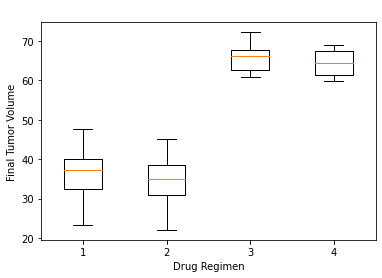

In [170]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
data = [cap_tumor_vol, ram_tumor_vol, inf_tumor_vol, cef_tumor_vol]

green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen (mm3)')
ax1.set_ylabel('Final Tumor Volume')
ax1.set_xlabel('Drug Regimen')
plt.xticks([1,2,3,4], drugs)
ax1.boxplot(data, flierprops=green_diamond, showfliers=True)

plt.show()

## Line and Scatter Plots

In [171]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2


In [172]:
single_cap_mouse = clean_df.loc[clean_df['Mouse ID'] == 's185']

cap_mouse_df = single_cap_mouse[['Tumor Volume (mm3)', 'Timepoint']]

cap_mouse_df

,Tumor Volume (mm3),Timepoint
10,45.000000,0
11,43.878496,5
12,37.614948,10
13,38.177232,15
14,36.866876,20
15,33.949940,25
16,32.959671,30
17,28.328531,35
18,25.472143,40
19,23.343598,45


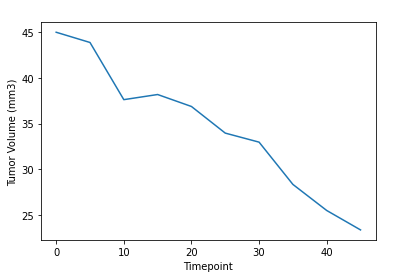

In [173]:

x= cap_mouse_df['Timepoint']
y= cap_mouse_df['Tumor Volume (mm3)']

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Time vs. Tumor Volume for Mouse s185(Treated with Capomulin)")
plt.plot(x,y)

plt.show()

In [174]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2


In [175]:
# Groupby Mouse ID using .agg() method and get the weight and mean of tumor volume
cap_mouse_id = cap_df.groupby(['Mouse ID']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Mouse_weight=('Weight (g)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
)
cap_mouse_id.head()

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,38.982878
b742,21,38.939633
g288,19,37.074024
g316,22,40.159220
i557,24,47.685963


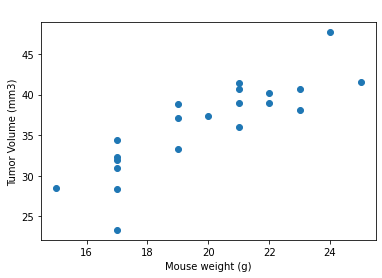

In [176]:
plt.scatter(
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean']
)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()


## Correlation and Regression

In [177]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = st.pearsonr(cap_mouse_id['Mouse_weight'],cap_mouse_id['Tumor_vol_mean'])
print(f"The correlation between mouse weight and average tumor volume is {corr[0]}")

The correlation between mouse weight and average tumor volume is 0.8490719078173735


The r-squared is: 0.8490719078173735
The equation of the regression line is: y = 1.72x + 2.0


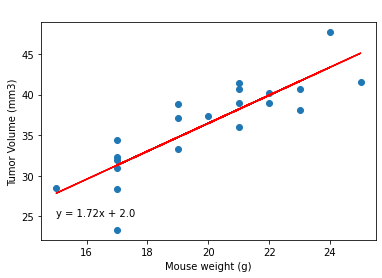

In [181]:
x = cap_mouse_id['Mouse_weight']
y = cap_mouse_id['Tumor_vol_mean']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(15,25),fontsize=10,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.show()